# Estimate Visitors In and Out


In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
camera = cv2.VideoCapture('test_video.mp4')
total_frame_number = camera.get(cv2.CAP_PROP_FRAME_COUNT)
print('Total # of frame:{}'.format(total_frame_number))
(grabbed, frame) = camera.read()

Total # of frame:1428.0


### Whole Interest Area
#### Downsample and Crop

In [3]:
(grabbed, frame) = camera.read()
# Set up downsample rate
downsample_rate = 0.5
frame_downsampled = cv2.resize(frame,None,fx=downsample_rate, fy=downsample_rate, interpolation = cv2.INTER_LINEAR)
# Set up crop border
original_h, original_w, channels= frame_downsampled.shape
print('original_h:{}, original_w:{}, channels:{}'.format(original_h, original_w, channels))
top_edge = int(original_h*(1/10))
down_edge = int(original_h*1)
left_edge = int(original_w*(1/5))
right_edge = int(original_w*(4/5))
print('top_edge:{}, down_edge:{}, left_edge:{}, right_edge:{}'.format(top_edge, down_edge, left_edge, right_edge))

original_h:540, original_w:960, channels:3
top_edge:54, down_edge:540, left_edge:192, right_edge:768


In [4]:
# downsample and crop frame
frame_downsampled = cv2.resize(frame,None,fx=downsample_rate, fy=downsample_rate, interpolation = cv2.INTER_LINEAR)
frame_cropped = frame_downsampled[top_edge:down_edge,left_edge:right_edge,:].copy() # must use copy(), otherwise slice only return address i.e. not hard copy

<IPython.core.display.Javascript object>


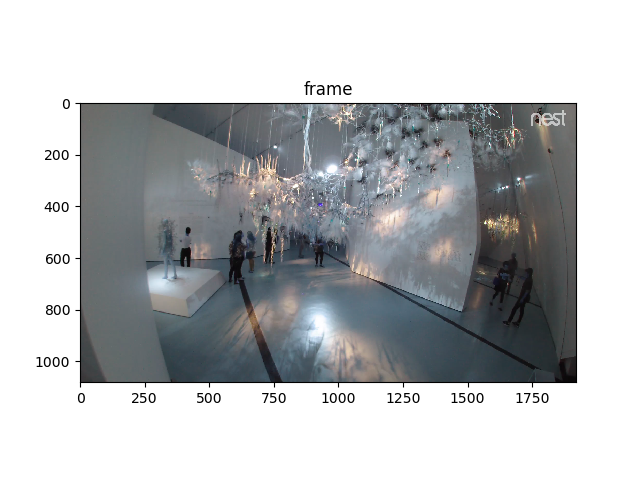

<IPython.core.display.Javascript object>


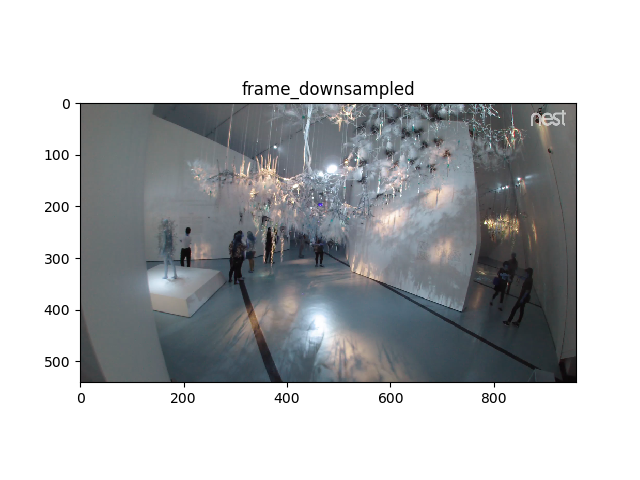

<IPython.core.display.Javascript object>


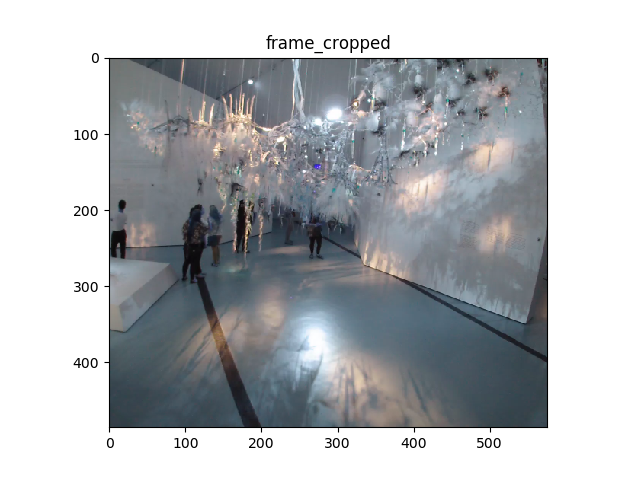

Text(0.5,1,'frame_cropped')

In [5]:
plt.figure()
plt.imshow(frame)
plt.title('frame')
plt.figure()
plt.imshow(frame_downsampled)
plt.title('frame_downsampled')
plt.figure()
plt.imshow(frame_cropped)
plt.title('frame_cropped')

### Define the Boundary Between Core Interest Area and Margin Interest Area

In [6]:
core_interest_area_polygon = np.array([[100,100],[100,300],[250,400],[350,350],[350,100]])

<IPython.core.display.Javascript object>


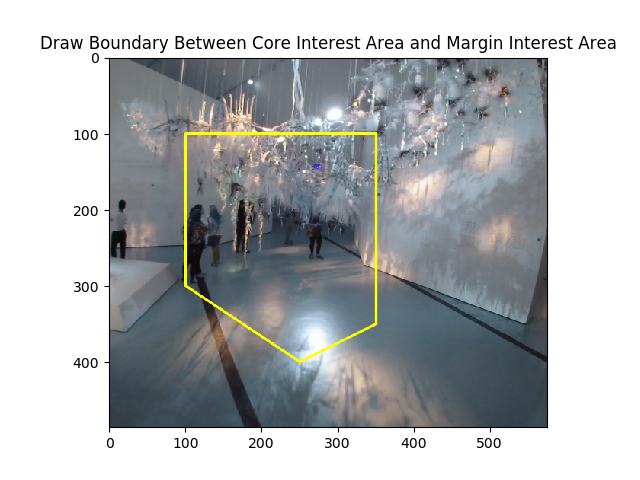

Text(0.5,1,'Draw Boundary Between Core Interest Area and Margin Interest Area')

In [7]:
# Show the bounday between core interest are and margin interest area
frame_cropped_copy = frame_cropped
cv2.drawContours(frame_cropped, [core_interest_area_polygon], -1, (255, 255, 0), 2, cv2.LINE_AA)
plt.figure()
plt.imshow(frame_cropped)
plt.title('Draw Boundary Between Core Interest Area and Margin Interest Area')

### Core Interest Area

<IPython.core.display.Javascript object>


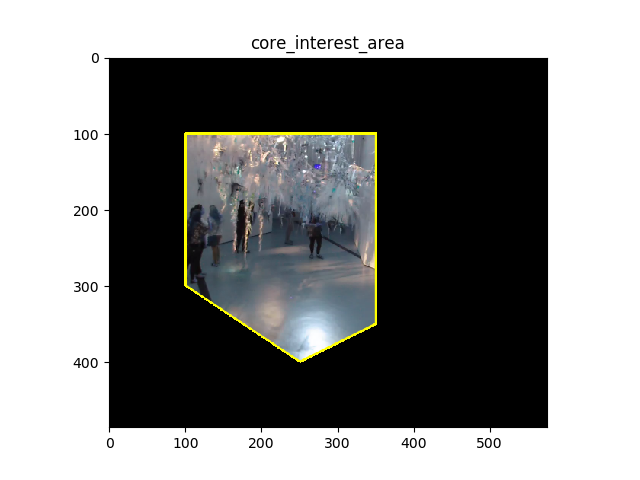

Text(0.5,1,'core_interest_area')

In [8]:
core_interest_area_mask = np.zeros(frame_cropped.shape[:2], np.uint8)
cv2.drawContours(core_interest_area_mask, [core_interest_area_polygon], -1, (255, 255, 255), -1, cv2.LINE_AA)

core_interest_area = cv2.bitwise_and(frame_cropped, frame_cropped, mask=core_interest_area_mask)

plt.figure()
plt.imshow(core_interest_area)
plt.title('core_interest_area')

### Margin Interst Area

<IPython.core.display.Javascript object>


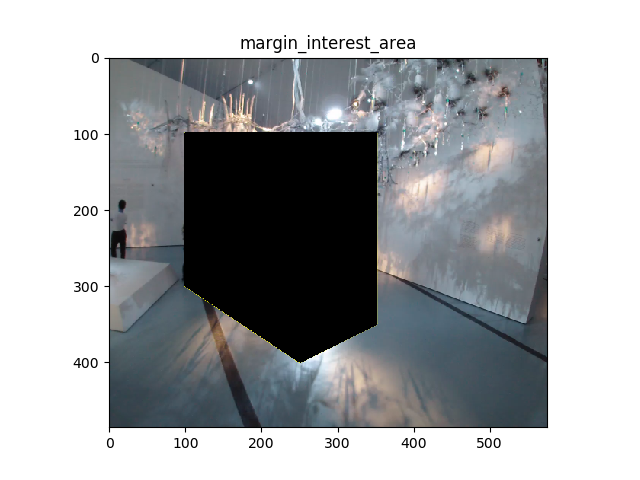

Text(0.5,1,'margin_interest_area')

In [9]:
margin_interest_area = cv2.bitwise_xor(frame_cropped, core_interest_area)
plt.figure()
plt.imshow(margin_interest_area)
plt.title('margin_interest_area')